In [1]:
cd(@__DIR__)
include("../AR/utils/utils.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")

Plot_Pheno_Dates (generic function with 1 method)

## Apple phenology model

Dormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

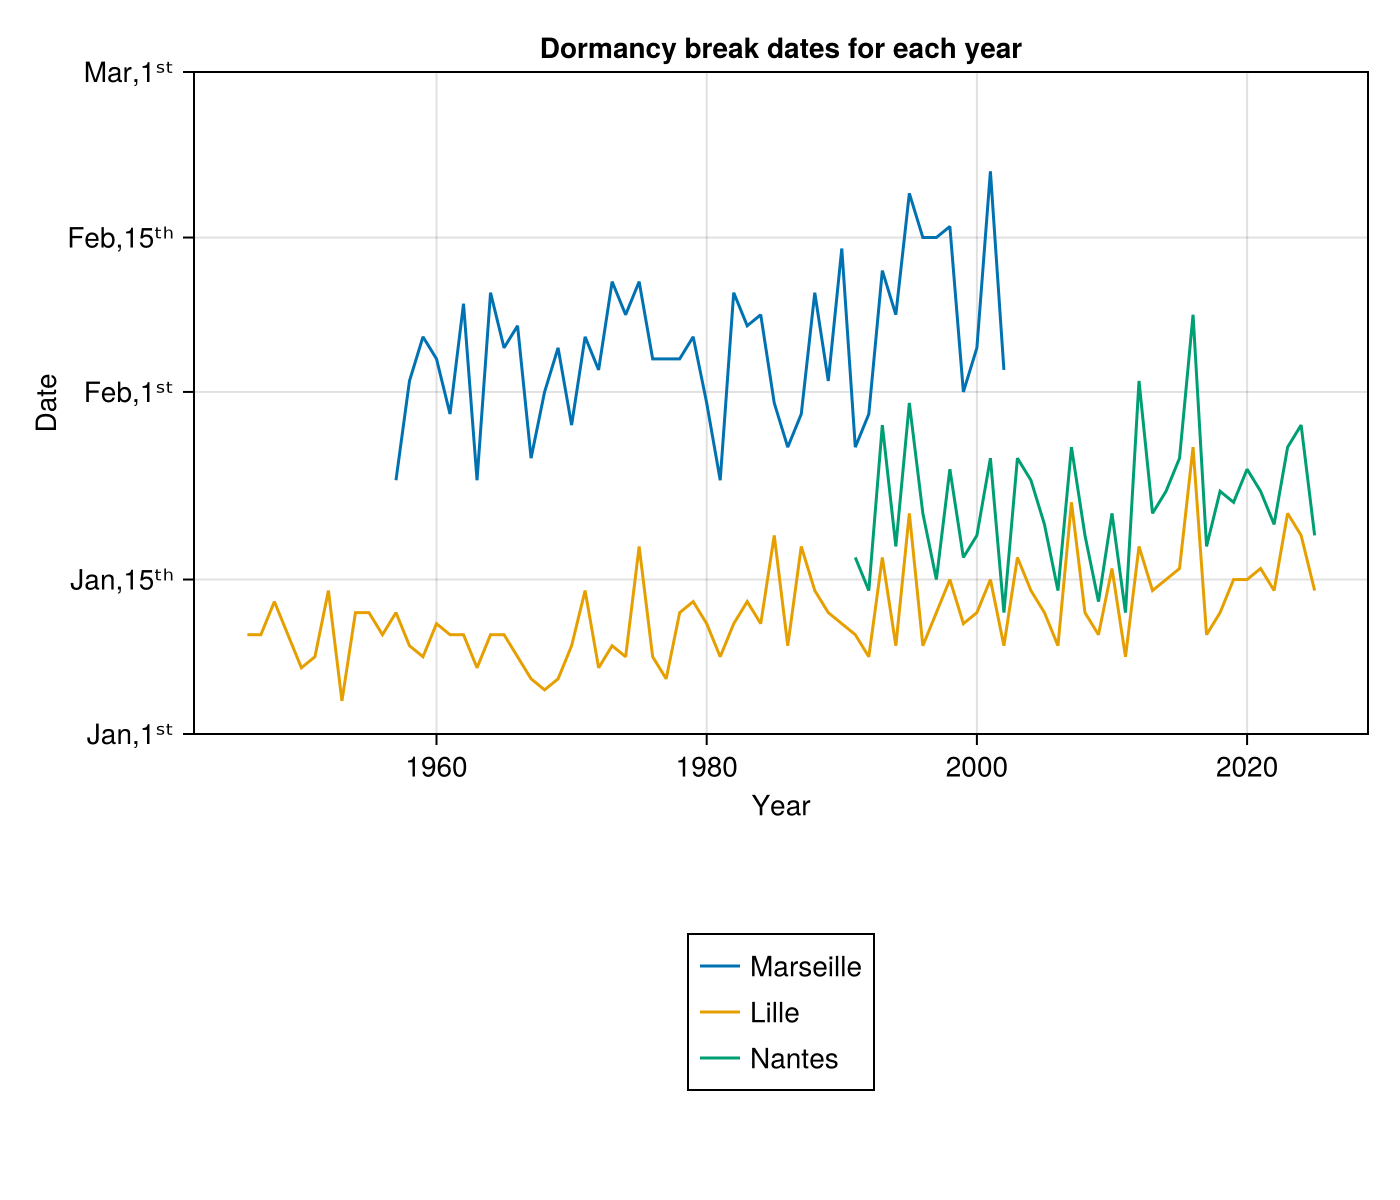

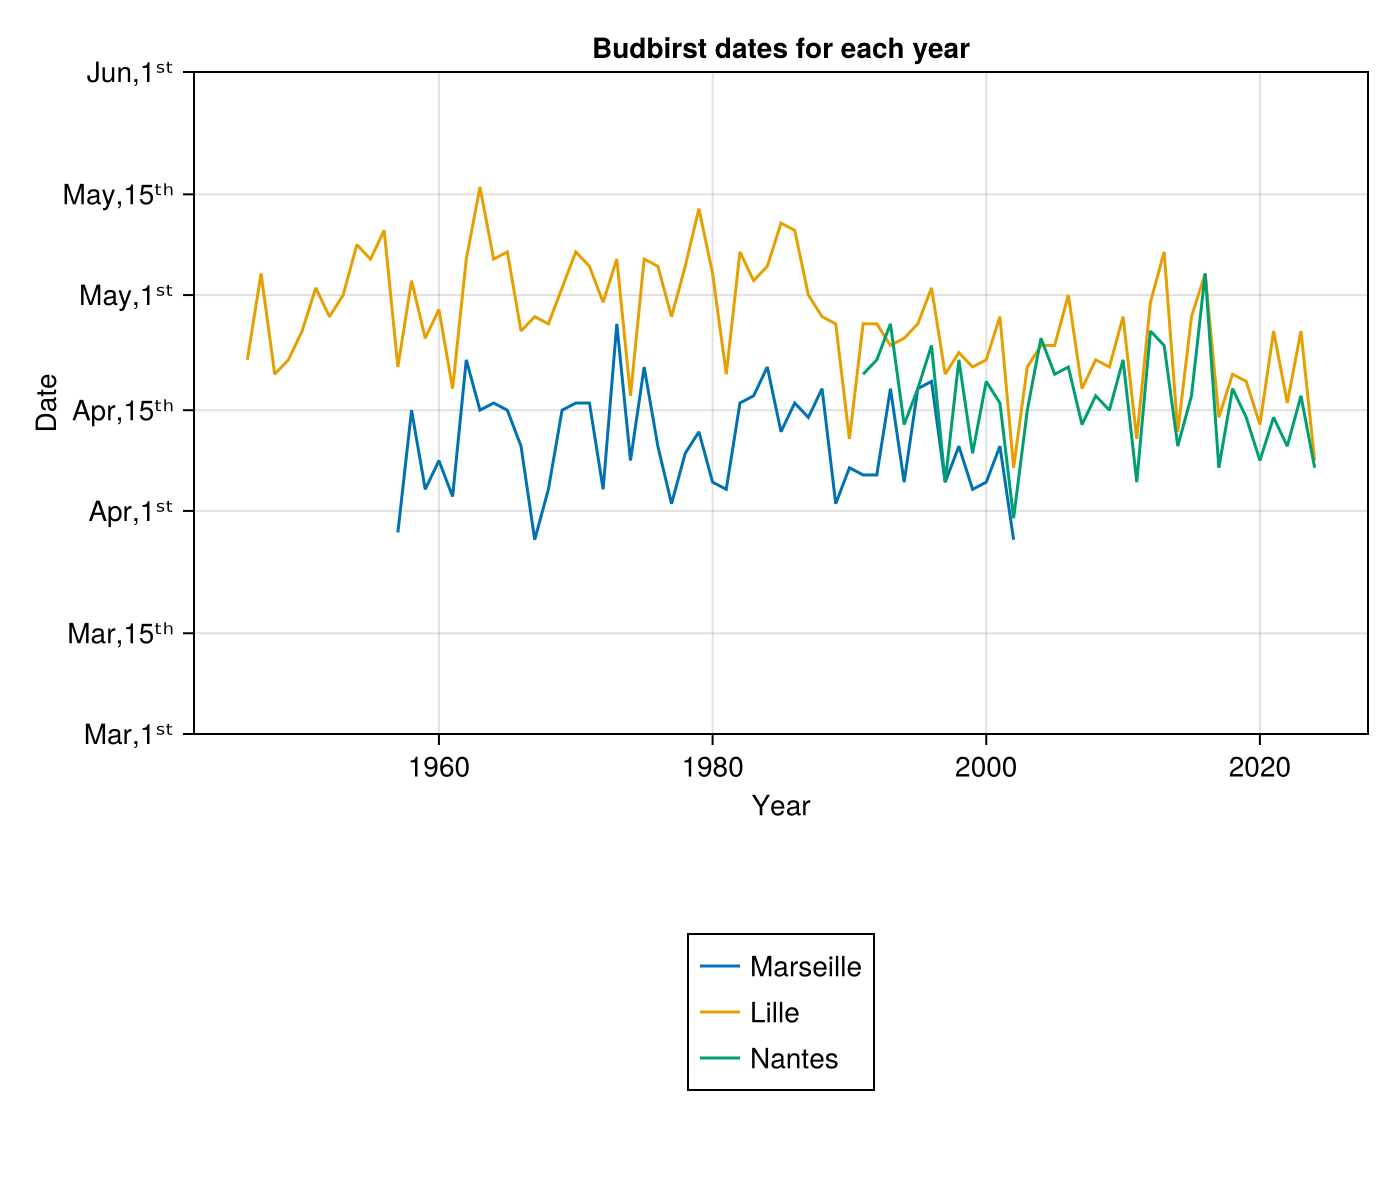

CairoMakie.Screen{IMAGE}


In [2]:
include("PhenoPred.jl")
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(initTG("TG_STAID000031.txt"))
DB_Lille, BB_Lille = Apple_Phenology_Pred(initTG("TG_STAID000737.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG("TG_STAID000742.txt"))
display(Plot_Pheno_Dates([DB_Marseille, DB_Lille, DB_Nantes], (10, 30), title="Dormancy break", labelvec=["Marseille", "Lille", "Nantes"]))
display(Plot_Pheno_Dates([BB_Marseille, BB_Lille, BB_Nantes], (10, 30), title="Budbirst", labelvec=["Marseille", "Lille", "Nantes"]), BB=true)

## Vine phenology model

Dormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

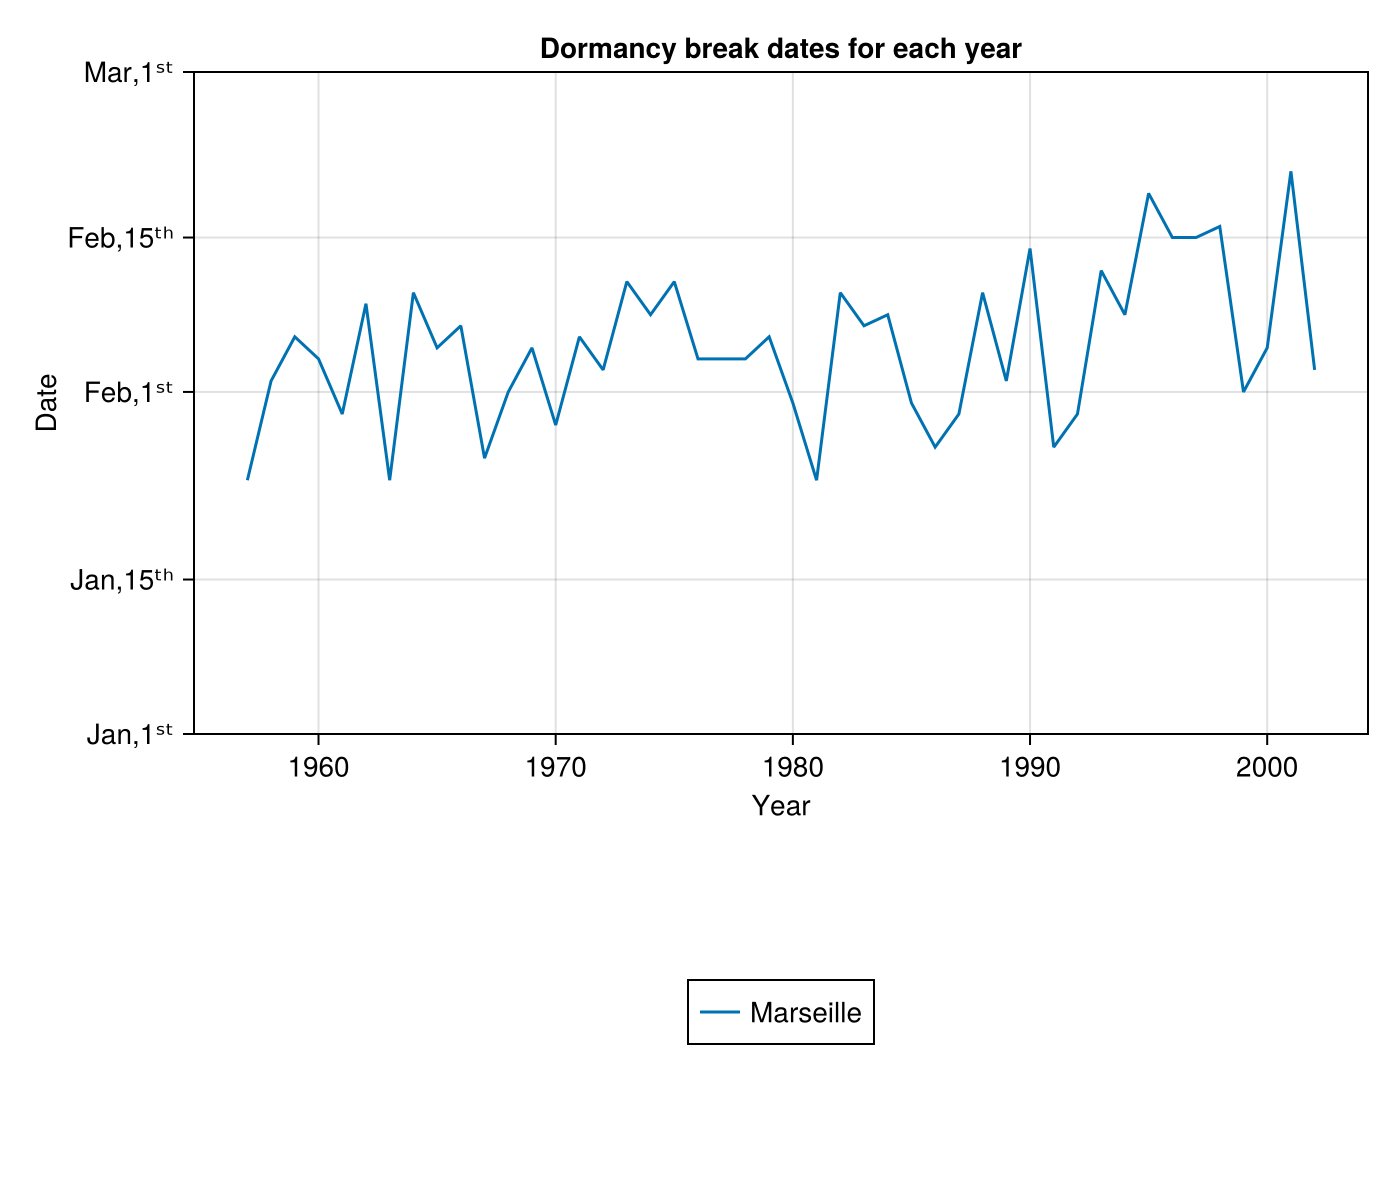

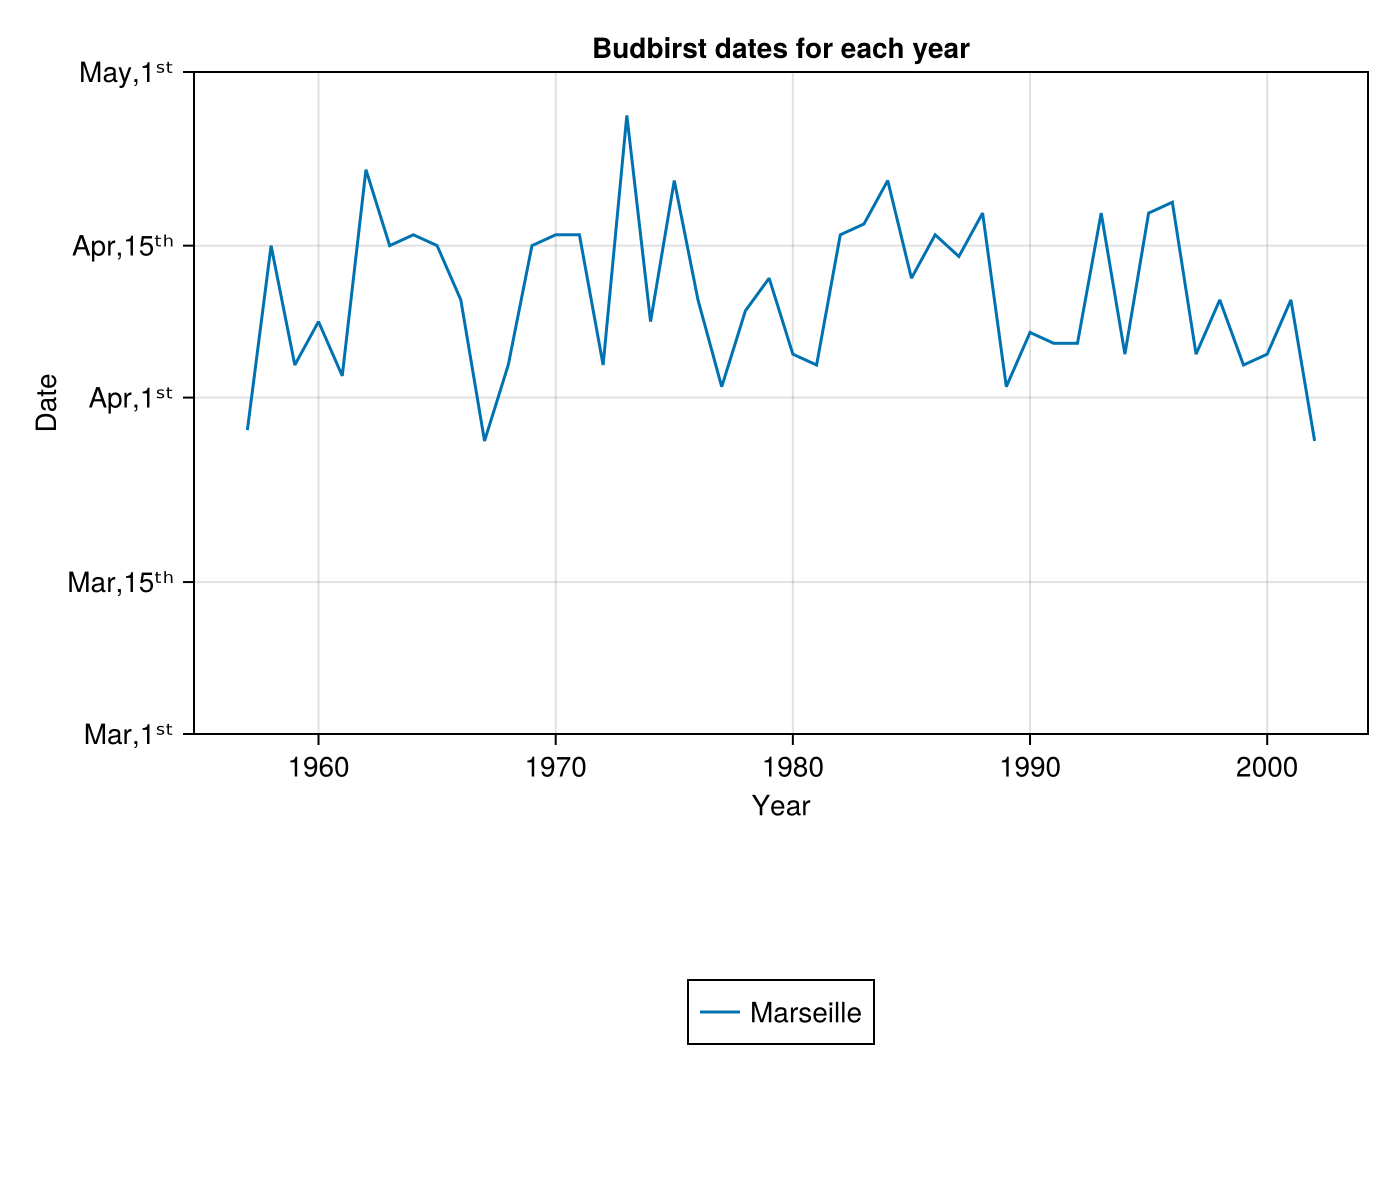

  21.768 ms (139550 allocations: 15.34 MiB)


CairoMakie.Screen{IMAGE}


In [3]:
include("PhenoPred.jl")
using BenchmarkTools

@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Dormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budbirst", labelvec=["Marseille"], BB=true))

Using a VinePhenoModel structure

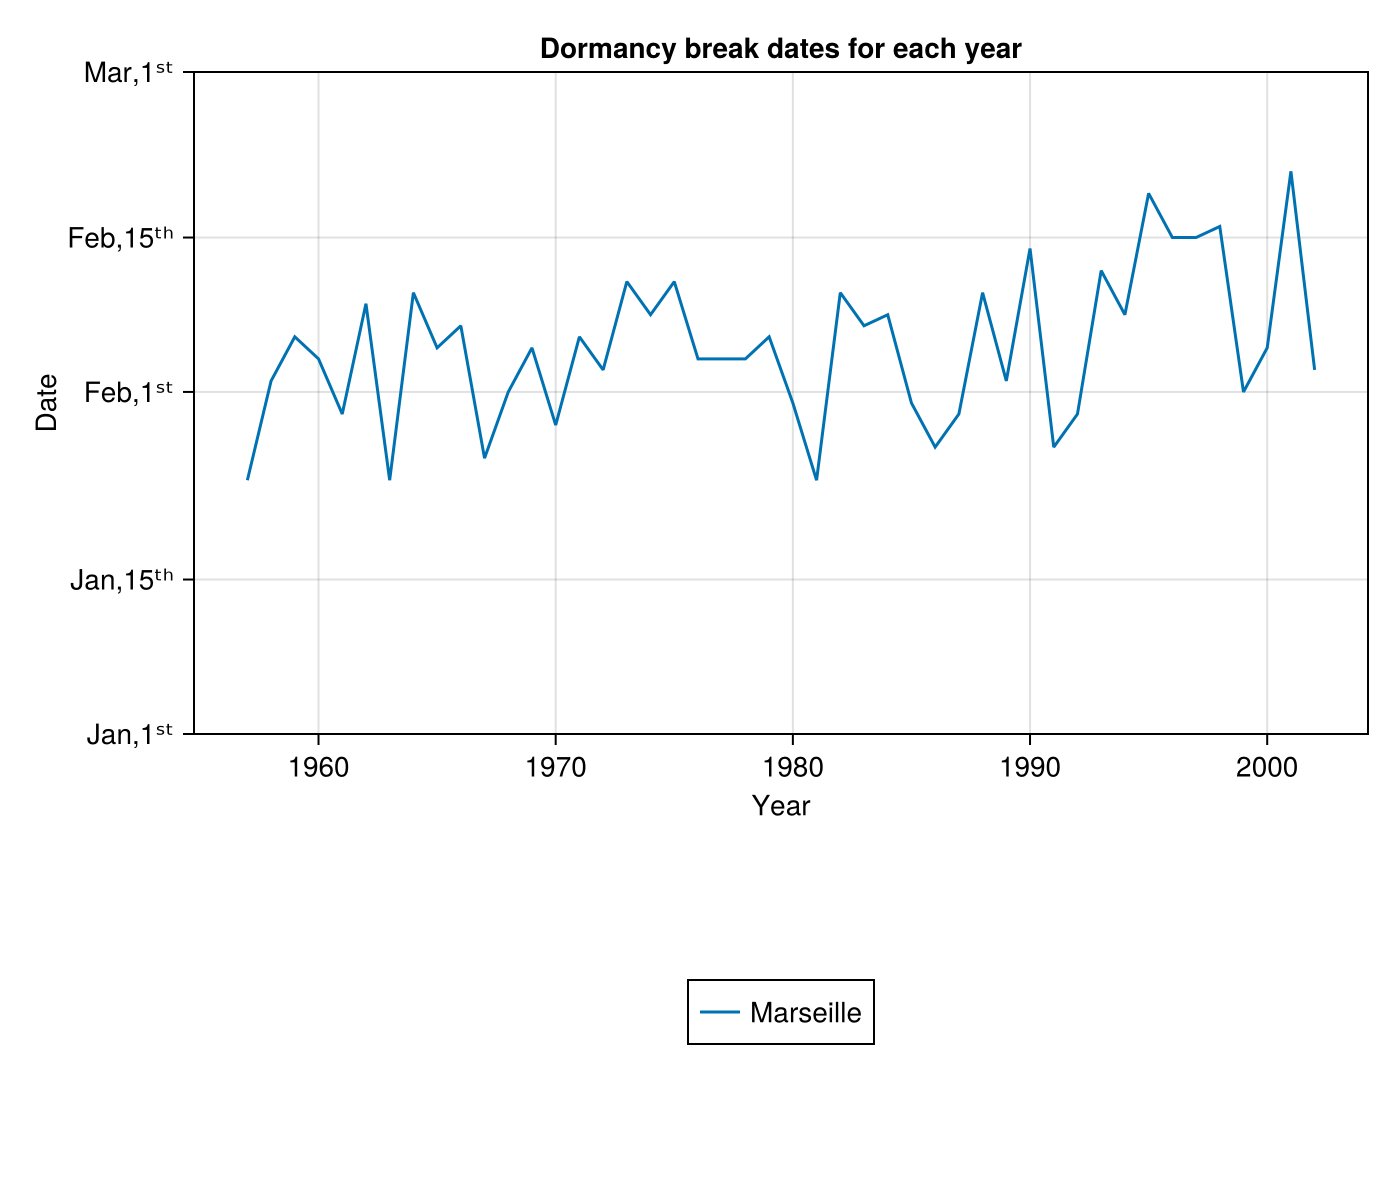

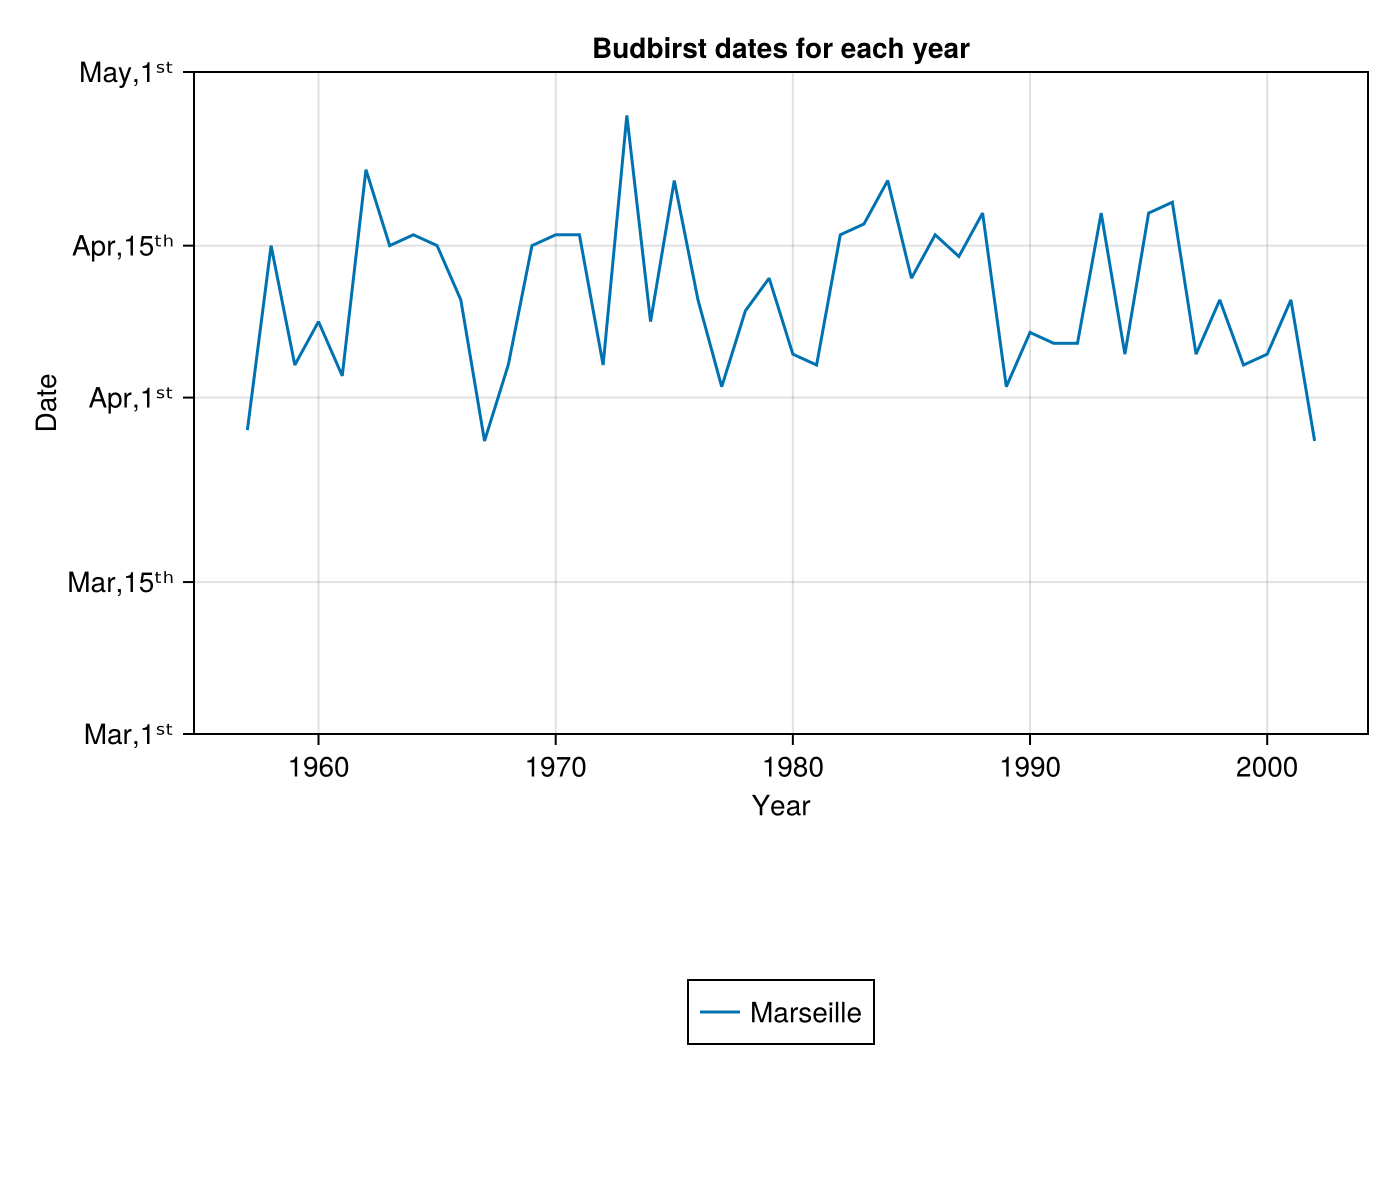

  34.396 ms (745975 allocations: 26.83 MiB)


CairoMakie.Screen{IMAGE}


In [4]:
@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred(InitVinePhenoModel("TN_STAID000031.txt", "TX_STAID000031.txt"))

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Dormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budbirst", labelvec=["Marseille"]), BB=true)

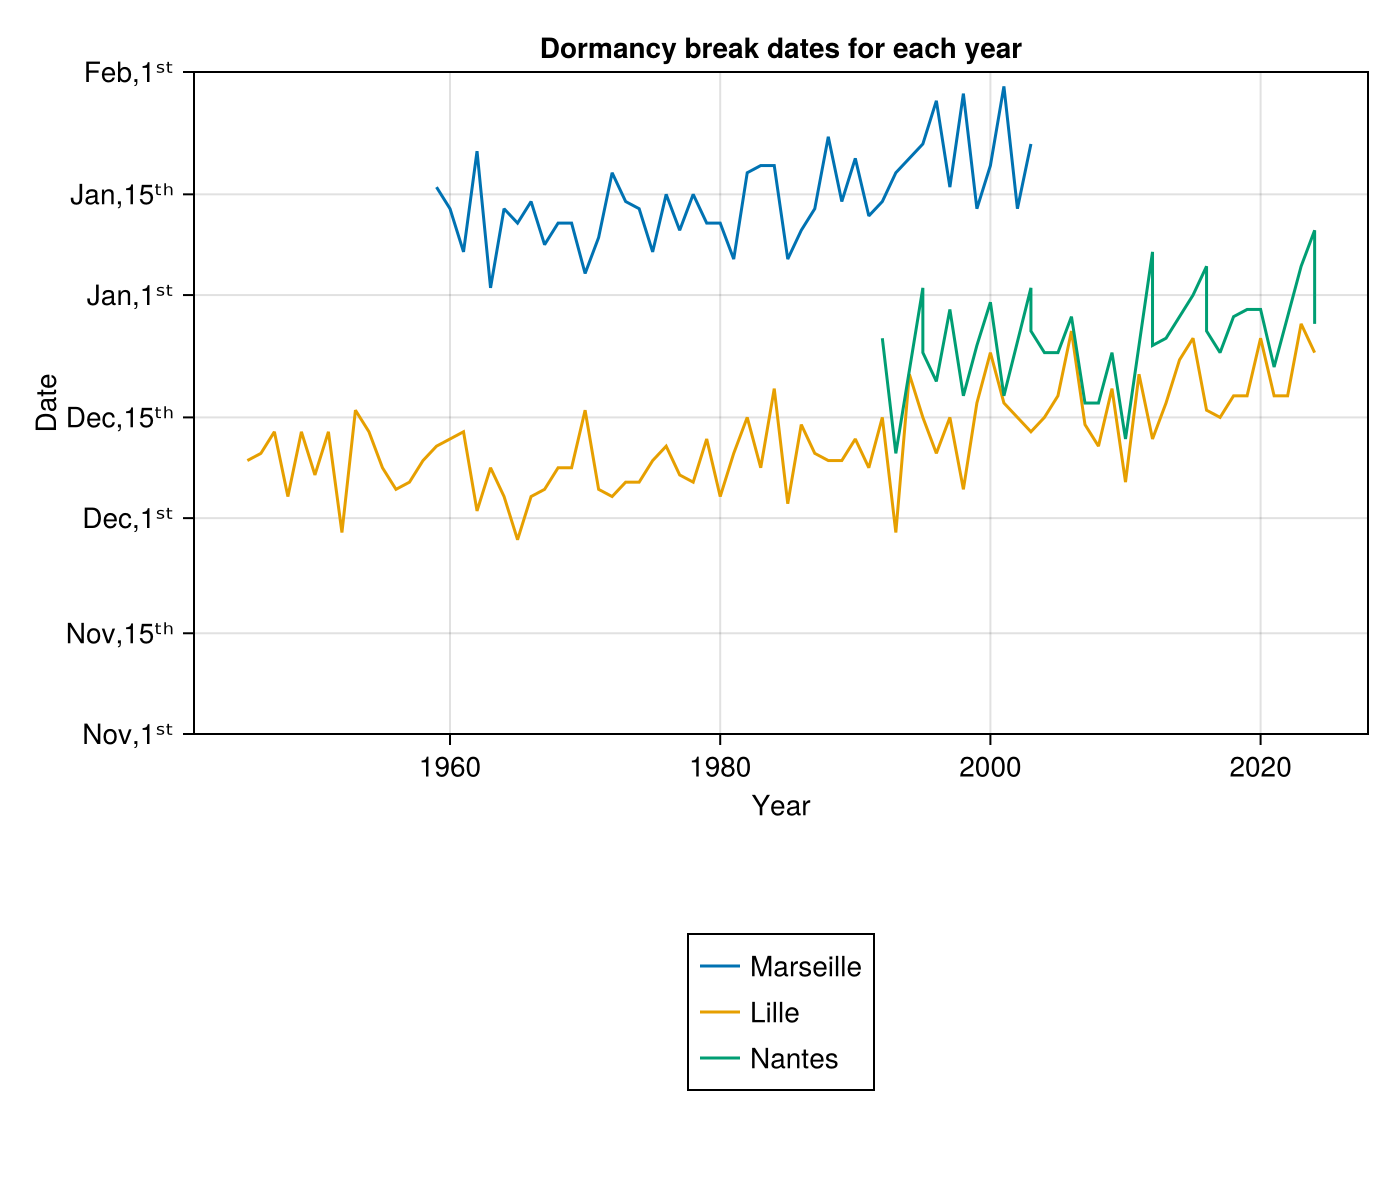

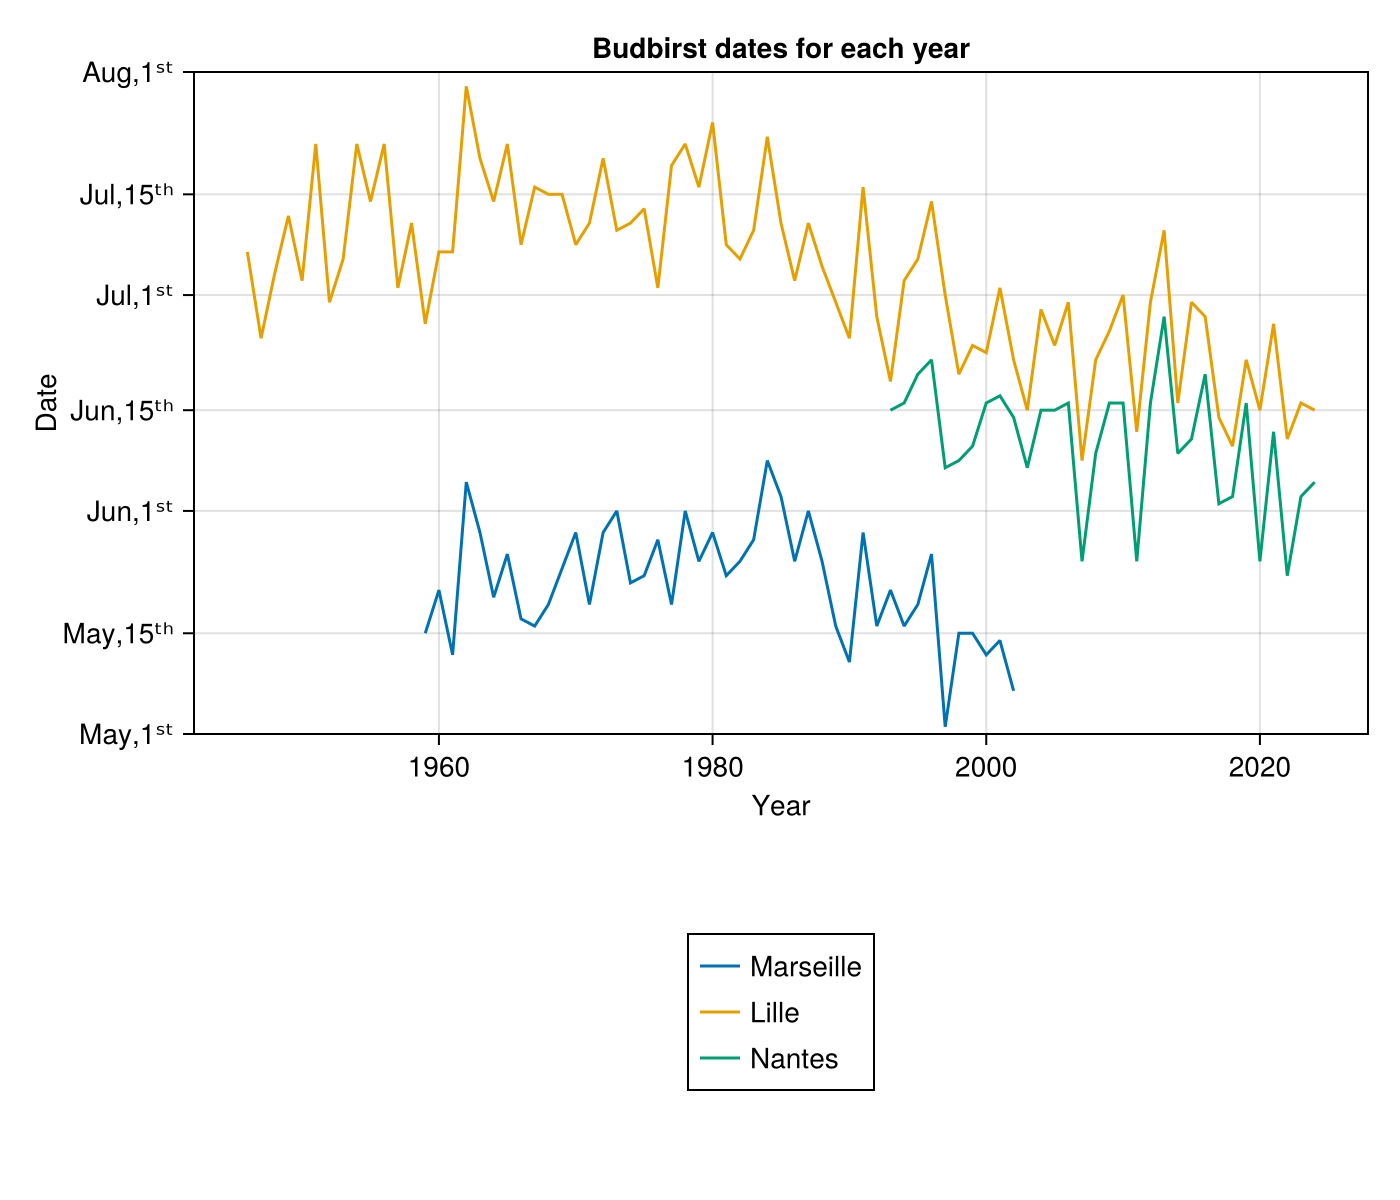

CairoMakie.Screen{IMAGE}


In [5]:
DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")
DB_Lille, BB_Lille = Vine_Phenology_Pred("TN_STAID000737.txt", "TX_STAID000737.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred("TN_STAID000742.txt", "TX_STAID000742.txt")
display(Plot_Pheno_Dates([DB_Marseille, DB_Lille, DB_Nantes], (8, 1), title="Dormancy break", labelvec=["Marseille", "Lille", "Nantes"]))
display(Plot_Pheno_Dates([BB_Marseille, BB_Lille, BB_Nantes], (8, 1), title="Budbirst", labelvec=["Marseille", "Lille", "Nantes"]), BB=true)

## Applying SWG on phenology models

Phenology of apple with generated data from a model trained on Marseille records

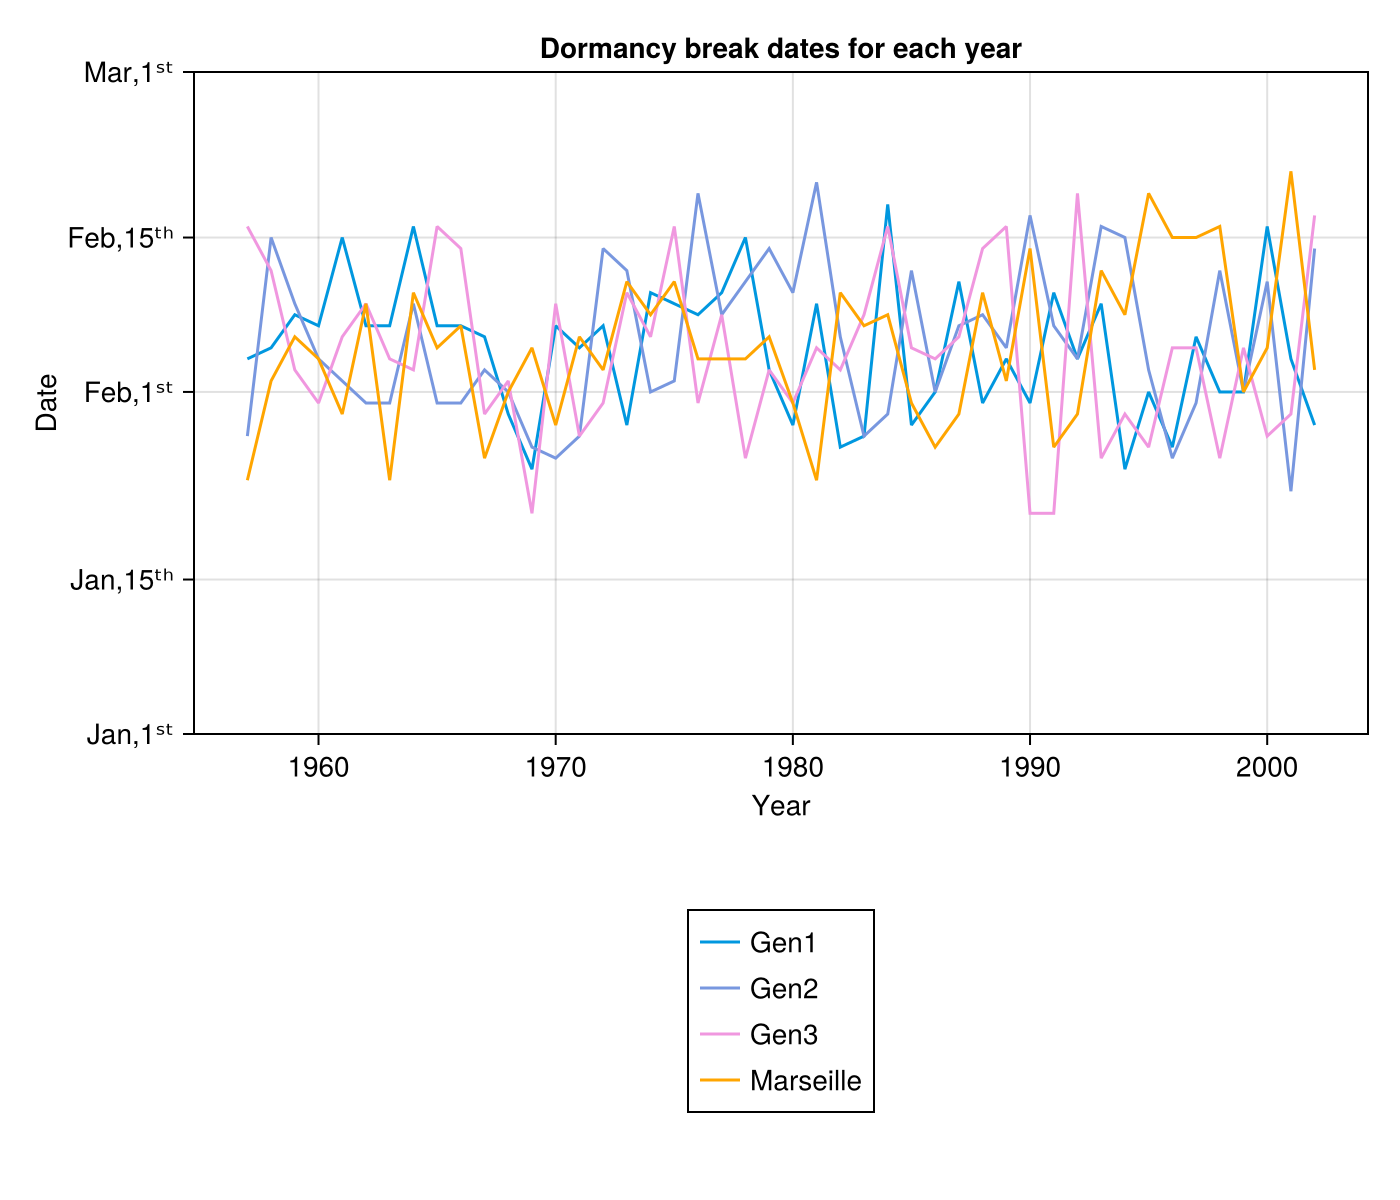

CairoMakie.Screen{IMAGE}


In [10]:
include("../AR/utils/Structure.jl")
cd(@__DIR__)
series = extract_series("TG_STAID000031.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 3)

DB_Marseille, BB_Marseille = Apple_Phenology_Pred(x, date_vec)
Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = [RGBf.((00:120:240) ./ 255, 151 / 255, 223 / 255); "orange"]
display(Plot_Pheno_Dates([Tab[1, :]; [DB_Marseille]], (10, 30), title="Dormancy break", labelvec=[["Gen$(i)" for i in 1:3]; "Marseille"], colors=colors))

Marseille

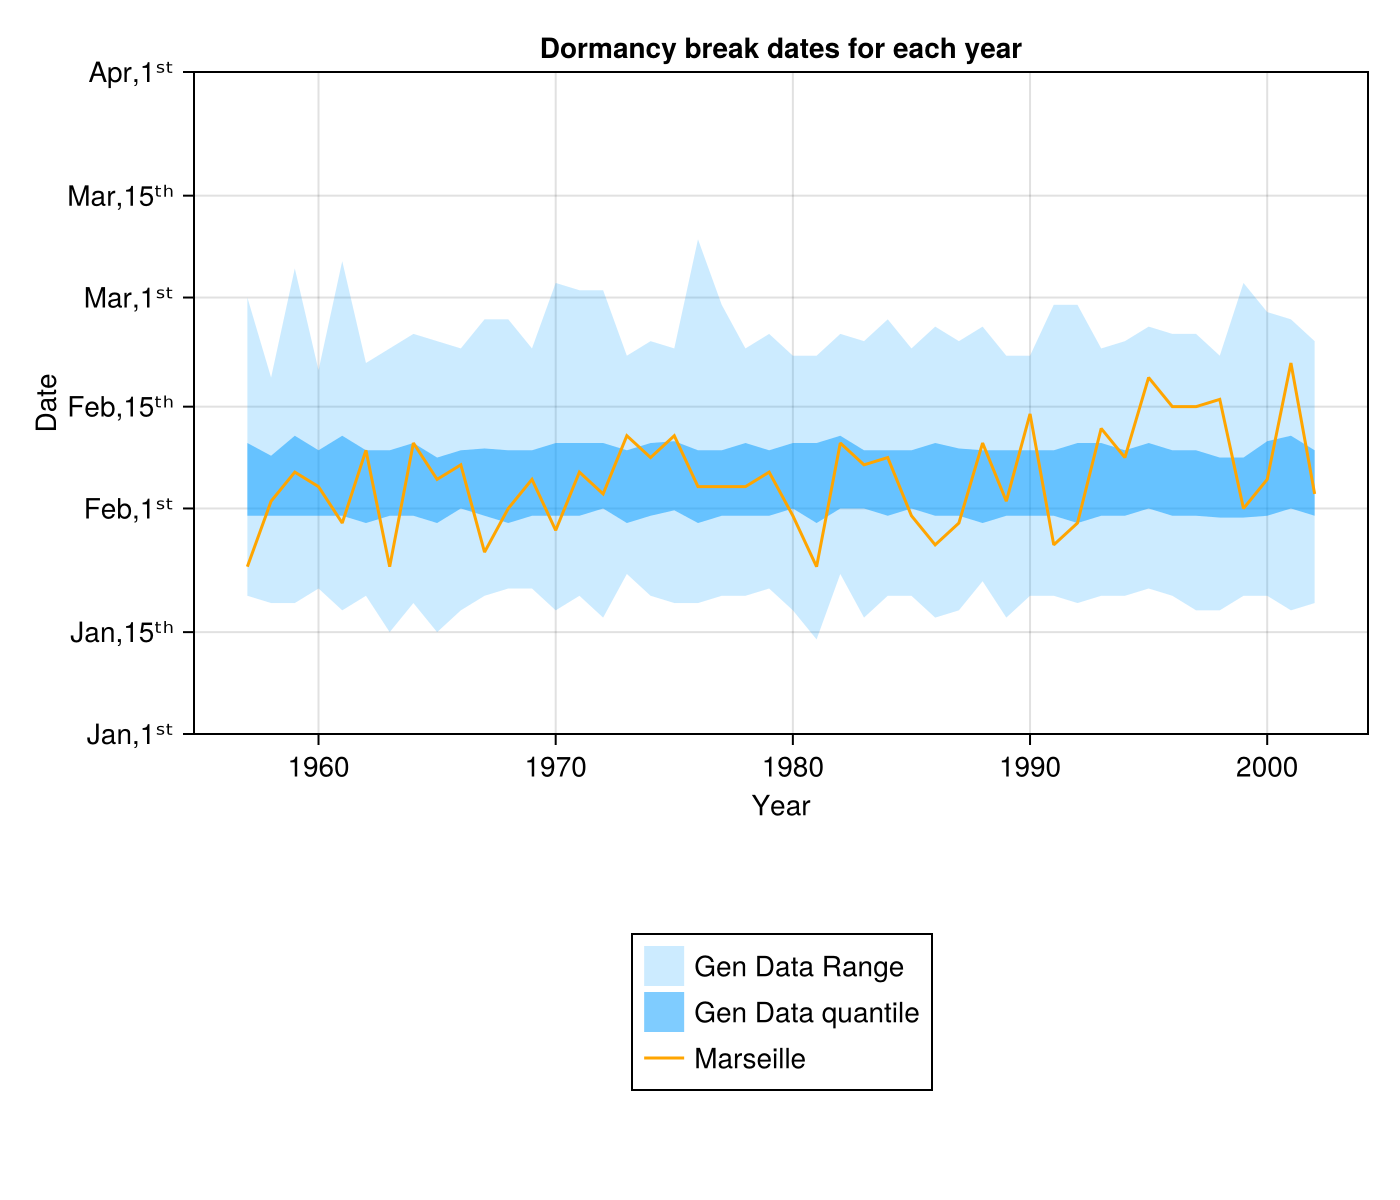

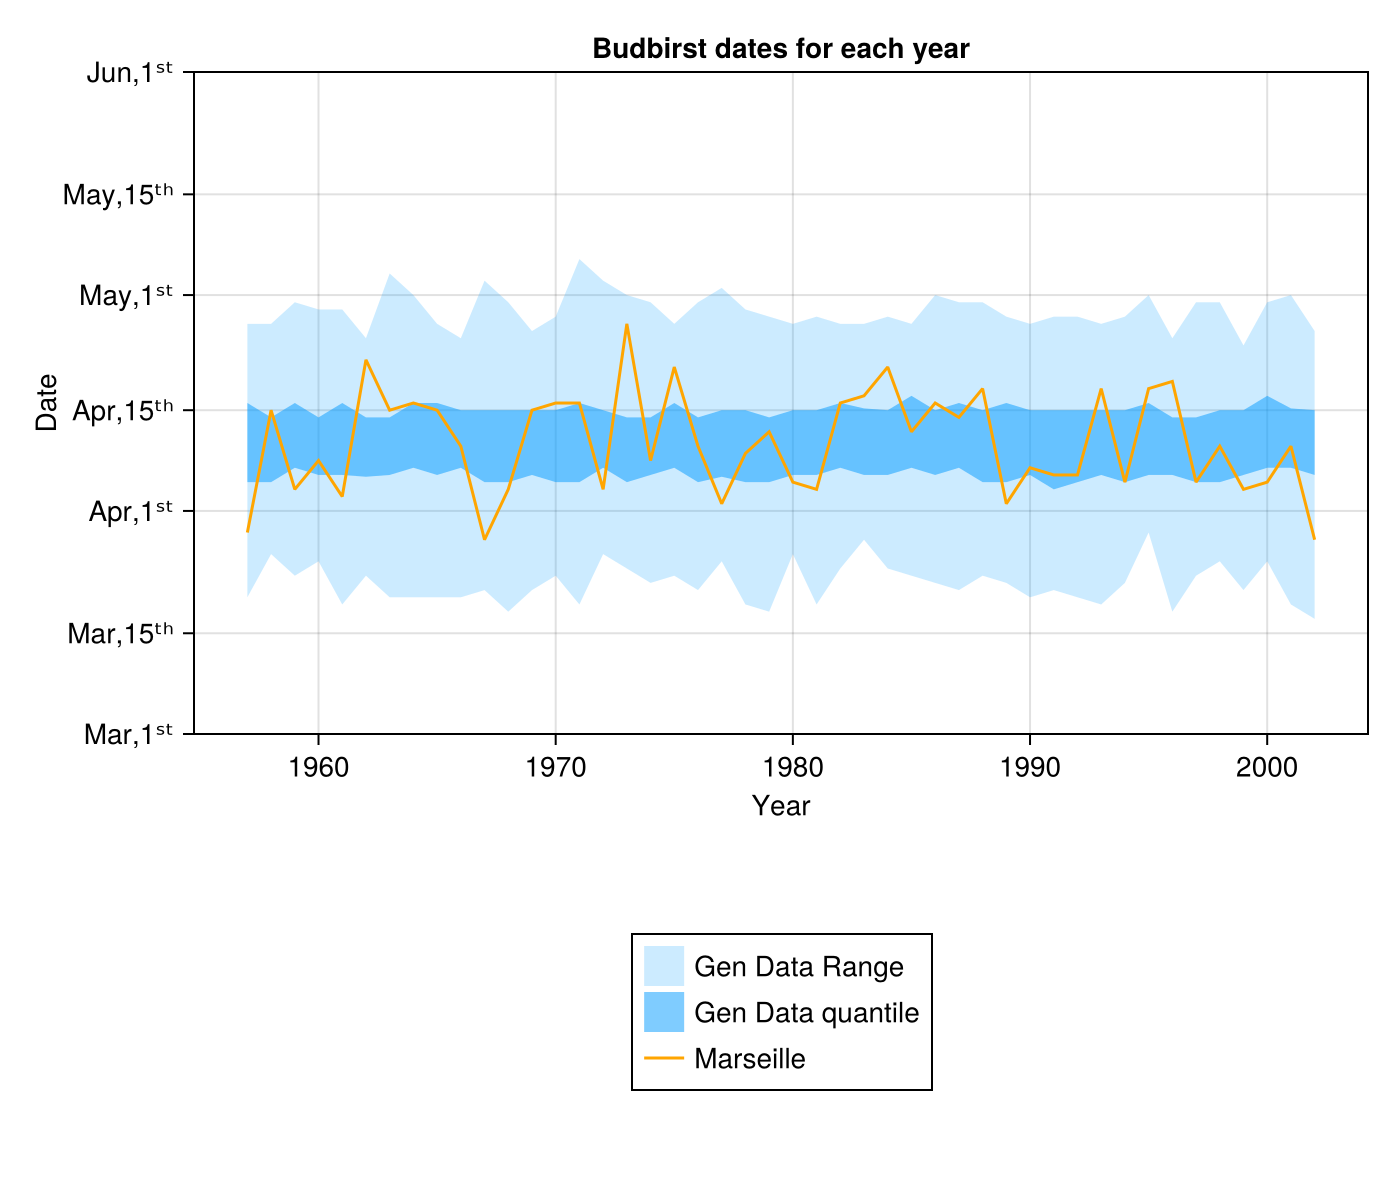

CairoMakie.Screen{IMAGE}


In [7]:
series = extract_series("TG_STAID000031.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

display(Plot_Pheno_Dates([DB_Marseille], (10, 30),
    sample_=Set_DB,
    title="Dormancy break",
    labelvec=["Gen Data Range", "Gen Data quantile", "Marseille"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "orange"]
))
display(Plot_Pheno_Dates([BB_Marseille], (10, 30),
    sample_=Set_BB,
    title="Budbirst",
    BB=true,
    labelvec=["Gen Data Range", "Gen Data quantile", "Marseille"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "orange"]
))


Lille

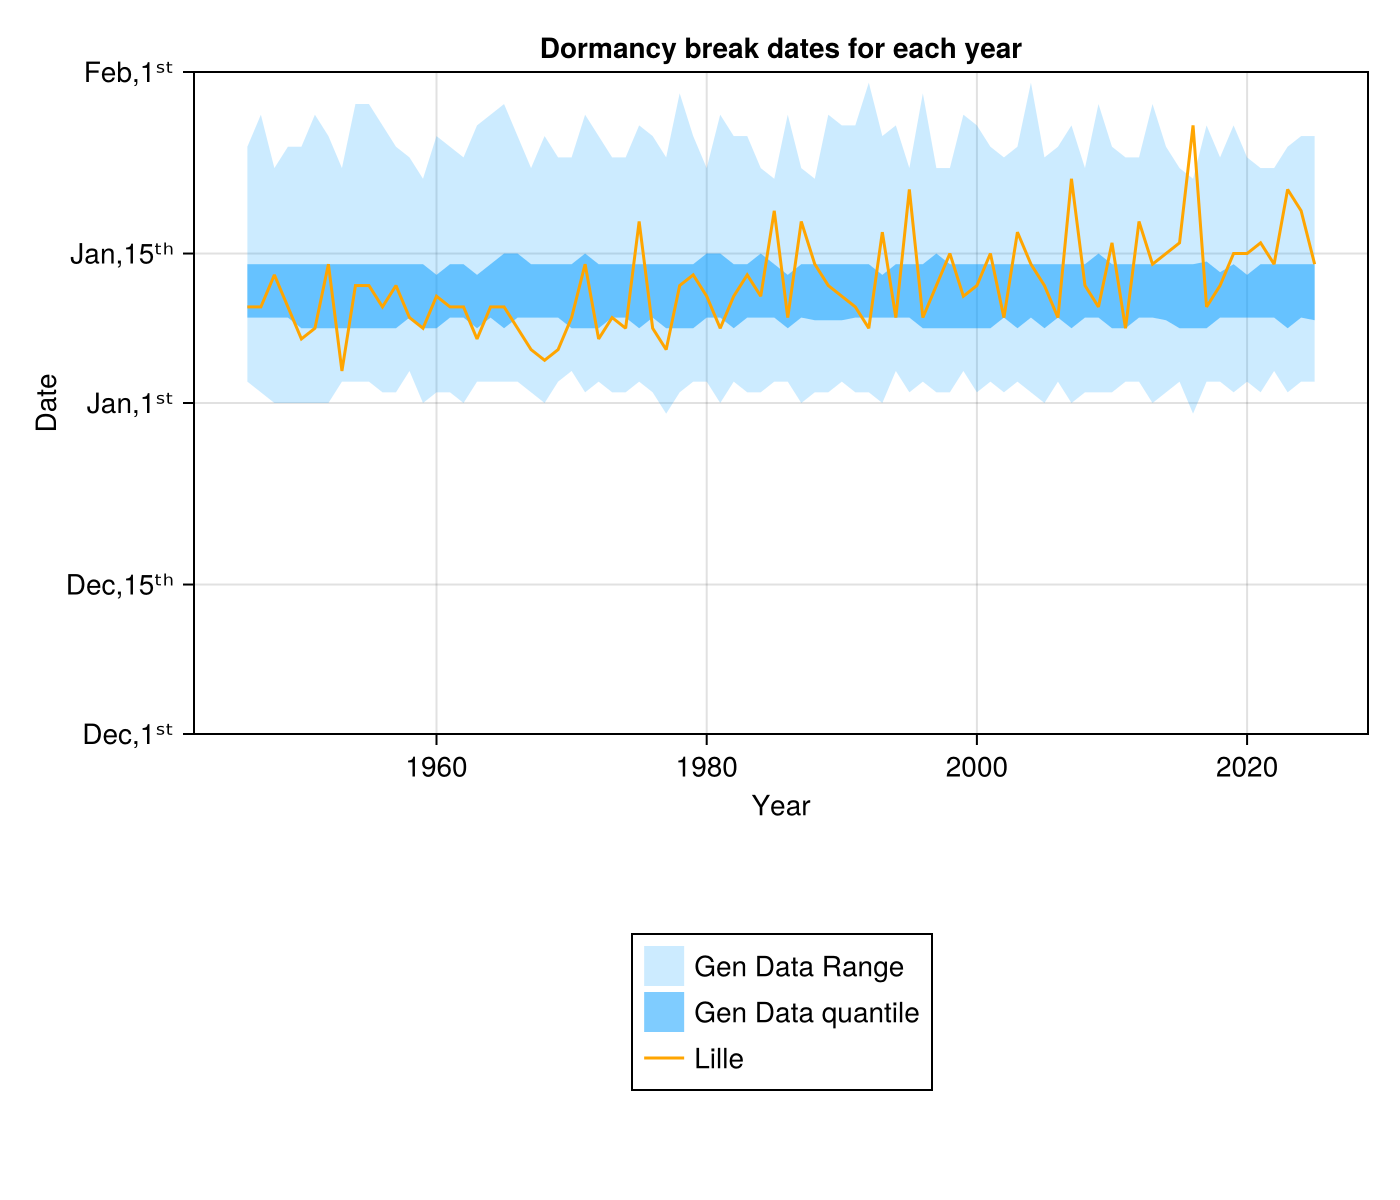

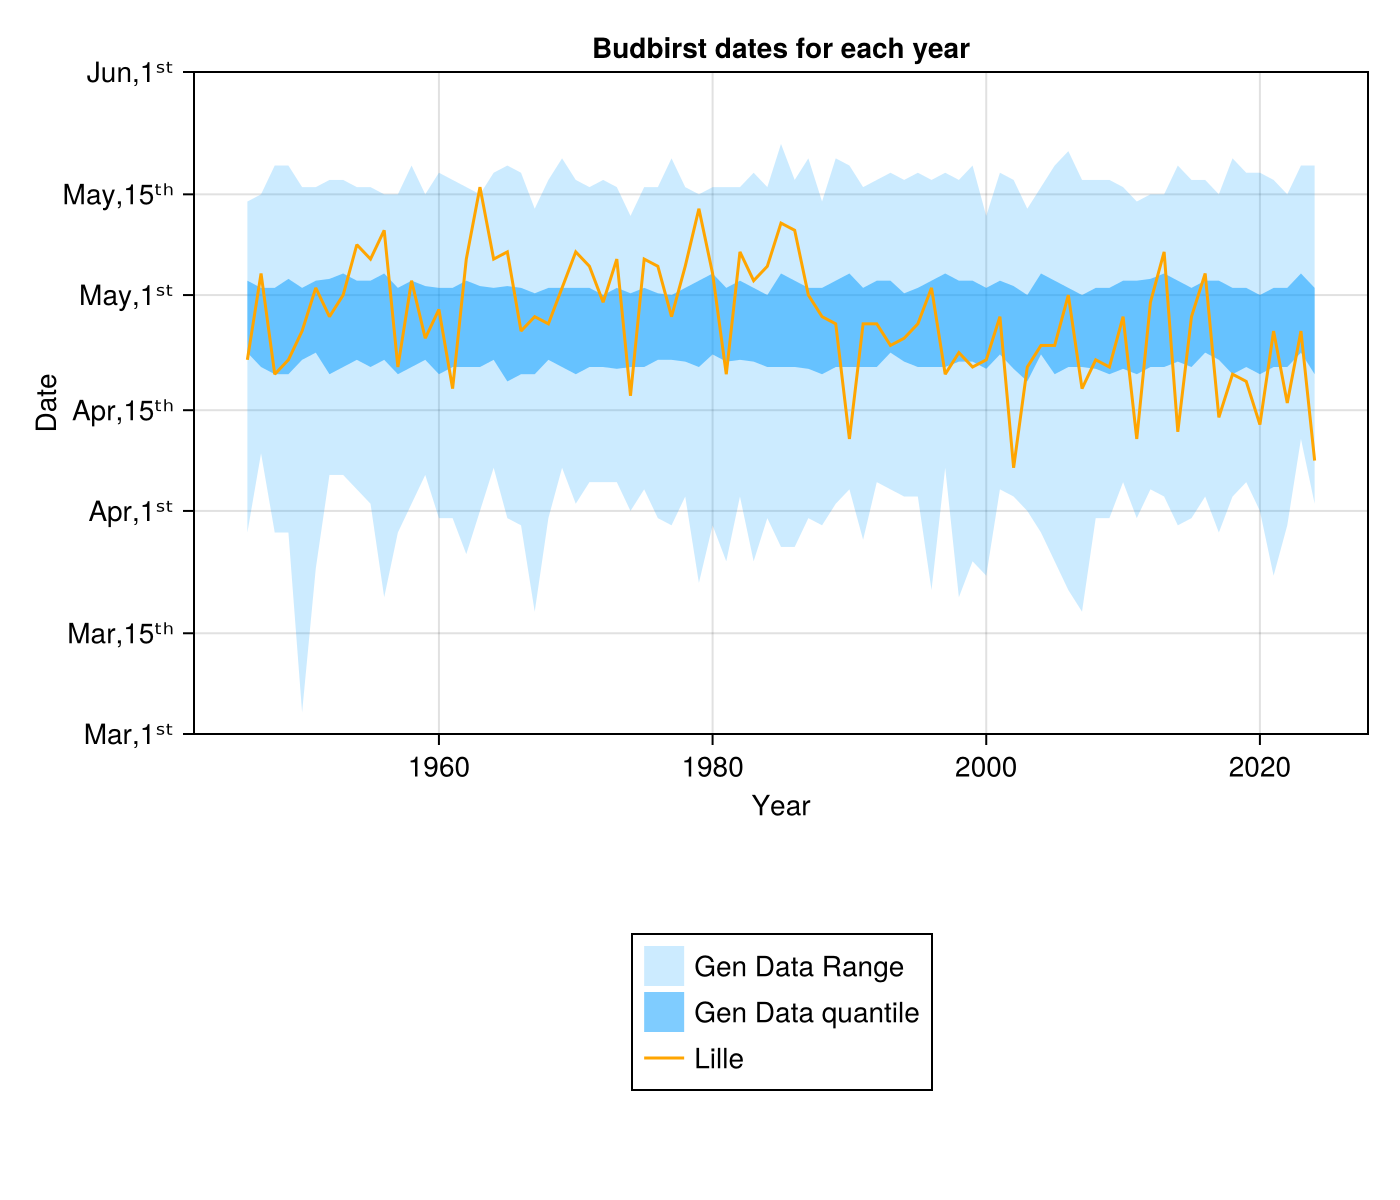

CairoMakie.Screen{IMAGE}


In [8]:
series = extract_series("TG_STAID000737.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Lille, BB_Lille = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

display(Plot_Pheno_Dates([DB_Lille], (10, 30),
    sample_=Set_DB,
    title="Dormancy break",
    labelvec=["Gen Data Range", "Gen Data quantile", "Lille"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "orange"]
))
display(Plot_Pheno_Dates([BB_Lille], (10, 30),
    sample_=Set_BB,
    title="Budbirst",
    BB=true,
    labelvec=["Gen Data Range", "Gen Data quantile", "Lille"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "orange"]
))


Nantes

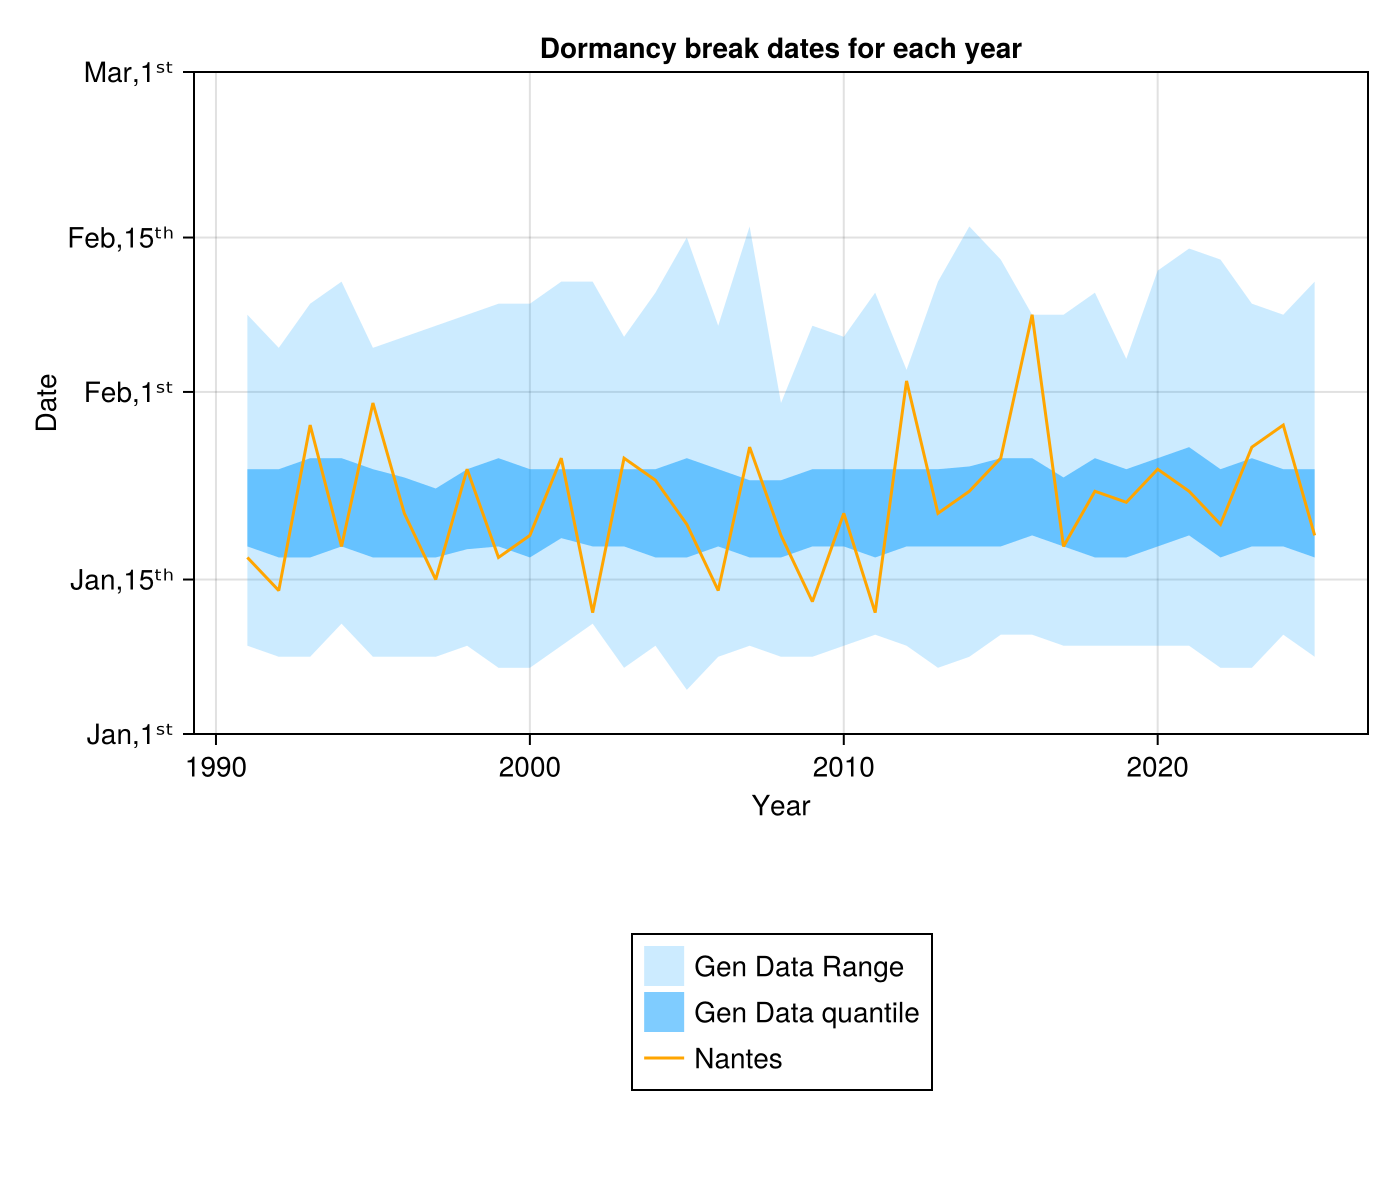

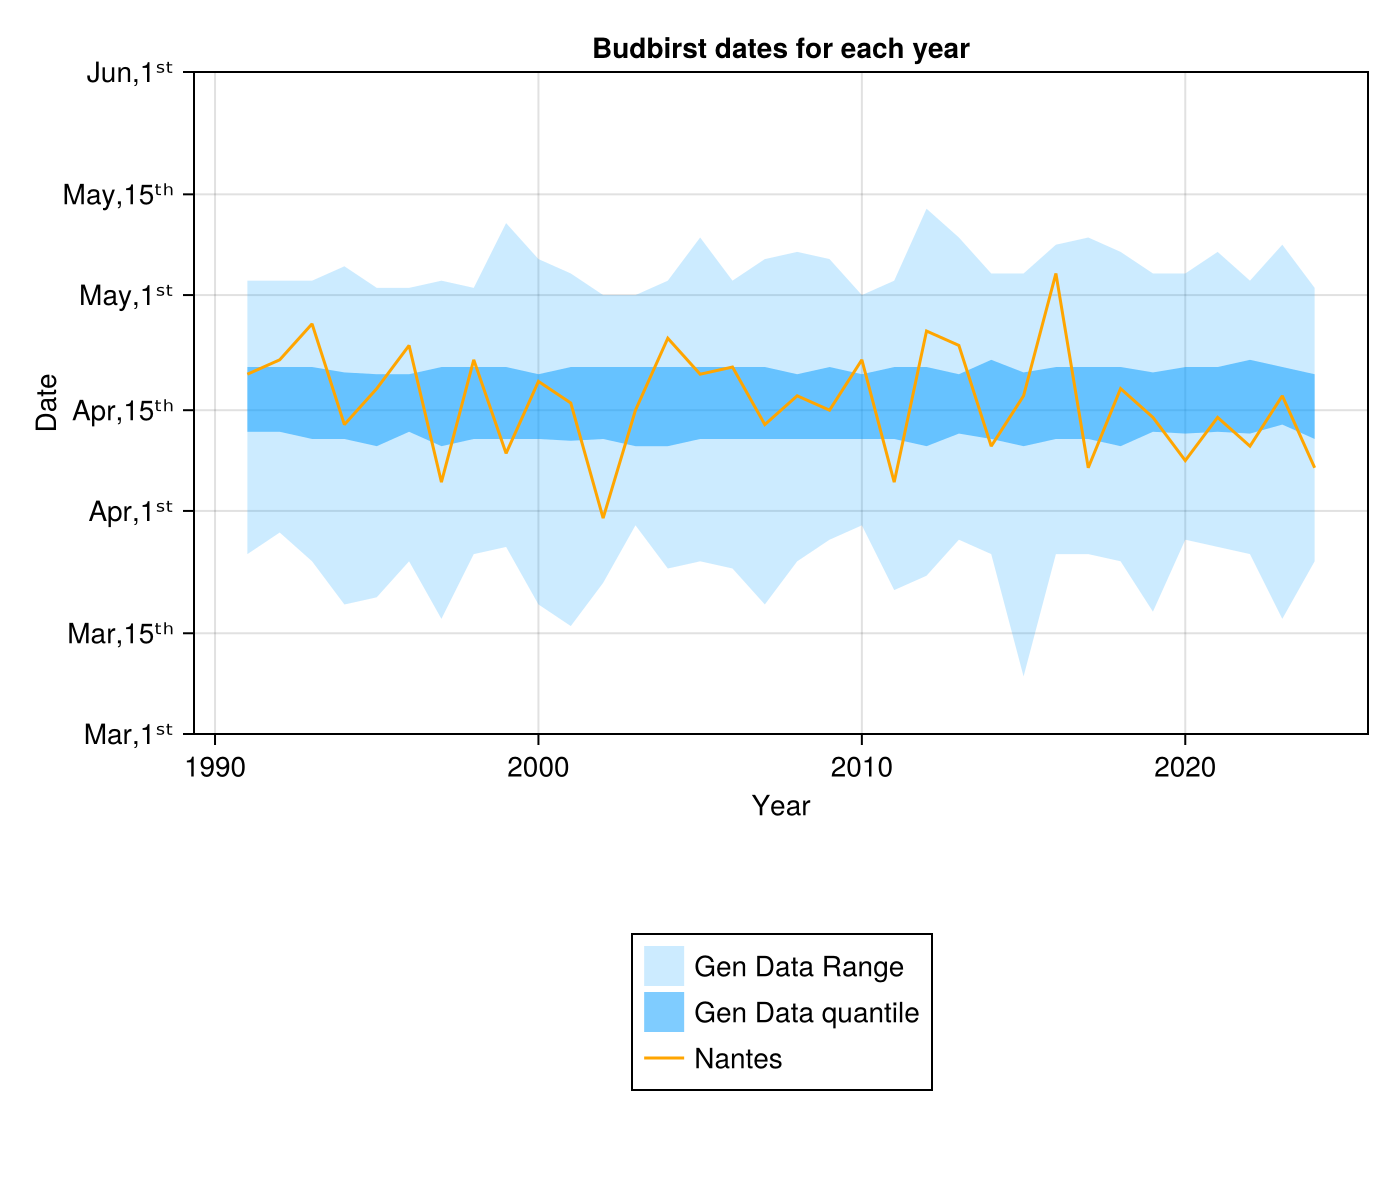

CairoMakie.Screen{IMAGE}


In [9]:
series = extract_series("TG_STAID000742.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

display(Plot_Pheno_Dates([DB_Nantes], (10, 30),
    sample_=Set_DB,
    title="Dormancy break",
    labelvec=["Gen Data Range", "Gen Data quantile", "Nantes"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "orange"]
))
display(Plot_Pheno_Dates([BB_Nantes], (10, 30),
    sample_=Set_BB,
    title="Budbirst",
    BB=true,
    labelvec=["Gen Data Range", "Gen Data quantile", "Nantes"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "orange"]
))
